In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
dp = pd.read_csv("Folds5x2_pp.csv")

In [3]:
dp

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [4]:
print(dp.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = dp.columns
d = scaler.fit_transform(dp)
df1 = pd.DataFrame(d,columns = names)

In [6]:
df1

,AT,V,AP,RH,PE
0,0.184986,0.274199,0.444197,0.863941,0.797616
1,0.618414,0.589502,0.458055,0.652011,0.337616
2,0.791218,0.561210,0.352883,0.219169,0.245033
3,0.488952,0.432918,0.354615,0.686729,0.434834
4,0.283003,0.272242,0.599852,0.960322,0.585033
...,...,...,...,...,...
9563,0.377054,0.419217,0.467953,0.634987,0.560662
9564,0.895184,0.935765,0.430834,0.457909,0.167417
9565,0.401700,0.319929,0.527345,0.711796,0.605298
9566,0.448725,0.614057,0.635734,0.926139,0.406225


In [7]:
df = pd.read_csv("titanic.csv")

We first perform all preprocessing steps

In [8]:
df["Age"].fillna(29,inplace = True)

In [9]:
df["Cabin"].fillna("UNKNOWN",inplace = True)
df["Embarked"].fillna("U",inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UNKNOWN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UNKNOWN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UNKNOWN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,UNKNOWN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,UNKNOWN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
import numpy as nm  
import matplotlib.pyplot as mtp  

We first set x and y values

In [12]:
x= df.iloc[:, [5,9]].values
y= df.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [14]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
classifier.score(x_test,y_test)

0.6636771300448431

In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
features = ['Pclass','Age','Fare','Parch']
x1 = df[features]
y1 = df['Survived']
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(200)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x1, y1)

tree.plot_tree(dtree, feature_names=features)

[Text(0.4485546666332799, 0.98, 'Pclass <= 2.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.16269364316239315, 0.94, 'Fare <= 13.646\ngini = 0.493\nsamples = 400\nvalue = [177, 223]'),
 Text(0.07264957264957266, 0.9, 'Fare <= 7.75\ngini = 0.435\nsamples = 94\nvalue = [64, 30]'),
 Text(0.06837606837606838, 0.86, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.07692307692307693, 0.86, 'Age <= 50.5\ngini = 0.464\nsamples = 82\nvalue = [52, 30]'),
 Text(0.05555555555555555, 0.82, 'Age <= 27.5\ngini = 0.479\nsamples = 73\nvalue = [44, 29]'),
 Text(0.029914529914529916, 0.78, 'Parch <= 1.5\ngini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.02564102564102564, 0.74, 'Fare <= 11.0\ngini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(0.017094017094017096, 0.7, 'Age <= 26.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.01282051282051282, 0.66, 'Age <= 22.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.008547008547008548, 0.62, 'Age <= 16.5\ngini = 0.48\n

We have succesfully plotted the Decision Tree

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[104,  35],
       [ 40,  44]])

The Confusion Matrix shows only 30 + 45 = 75 incorrect predictions and 104 + 44 = 148 correct predictions. Its a good measure compared to other measures.

#Train Descison Tree Visualization

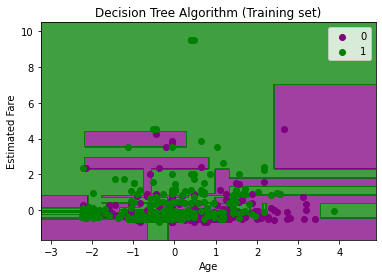

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i,j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
  c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Fare')  
mtp.legend()  
mtp.show()  

#Test Descision Tree Visualization

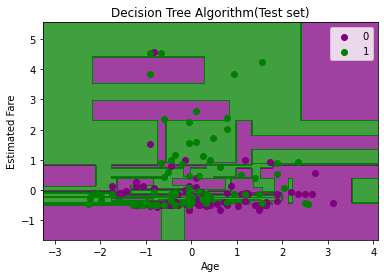

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i,j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
  c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Fare')  
mtp.legend()  
mtp.show()  

We are able to visualize the Decision tree graph of the Test set - we can infer that around a particular section where the green and purple spots are out of place is where most of the false values lie. We can try to preprocess further and see how to improve this.

In [ ]:
dp

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


#AT VS AP

In [16]:
x= dp.iloc[:, 0].values  
y= dp.iloc[:, 2].values   

In [17]:
y

array([1010.84, 1011.4 , 1007.15, ..., 1014.2 , 1018.58, 1011.86])

In [18]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [19]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [20]:
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  

In [22]:
regressor.score(x_test,y_test)

0.26242818533892165

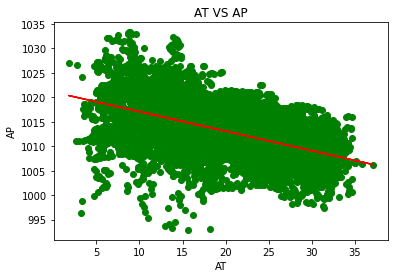

In [21]:
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("AT VS AP")  
mtp.xlabel("AT")  
mtp.ylabel("AP")  
mtp.show()   

Plotting Graph for Train set of AT vs AP

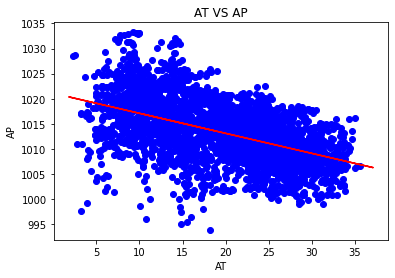

In [ ]:
mtp.scatter(x_test, y_test, color="blue")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("AT VS AP")  
mtp.xlabel("AT")  
mtp.ylabel("AP")  
mtp.show()   

Plotting Graph for Test set of AT vs AP

In [ ]:
for col in dp.columns:
  print(col)

AT
V
AP
RH
PE


In [ ]:
dp.iloc[:, i].values 

array([40.77, 58.49, 56.9 , ..., 43.34, 59.87, 51.3 ])

In [ ]:
def linregtrn():
  n = len(dp.columns) 
  i = 0
  j = 0
  for col in dp.columns:
    for col1 in dp.columns:
      if(col != col1):
        x1= nm.array(dp[col].values.tolist())
        y1= nm.array(dp[col1].values.tolist())
        x_train, x_test, y_train, y_test= train_test_split(x1, y1, test_size= 1/3, random_state=0)
        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)  
        regressor= LinearRegression()  
        regressor.fit(x_train, y_train)
        y_pred= regressor.predict(x_test)  
        x_pred= regressor.predict(x_train)
        print("Train Set")
        mtp.scatter(x_train, y_train, color="green")   
        mtp.plot(x_train, x_pred, color="red")    
        mtp.title(col+" VS "+col1)  
        mtp.xlabel(col)  
        mtp.ylabel(col1)  
        mtp.show()
              


In [ ]:
def nlinregtrn():
  n = len(df1.columns) 
  i = 0
  j = 0
  for col in df1.columns:
    for col1 in df1.columns:
      if(col != col1):
        x1= nm.array(df1[col].values.tolist())
        y1= nm.array(df1[col1].values.tolist())
        x_train, x_test, y_train, y_test= train_test_split(x1, y1, test_size= 1/3, random_state=0)
        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)  
        regressor= LinearRegression()  
        regressor.fit(x_train, y_train)
        y_pred= regressor.predict(x_test)  
        x_pred= regressor.predict(x_train)
        print("Train Set")
        mtp.scatter(x_train, y_train, color="green")   
        mtp.plot(x_train, x_pred, color="red")    
        mtp.title(col+" VS "+col1)  
        mtp.xlabel(col)  
        mtp.ylabel(col1)  
        mtp.show()

In [ ]:
def nlinregtst():
  n = len(df1.columns) 
  i = 0
  j = 0
  for cola in df1.columns:
    for colb in df1.columns:
      if(cola != colb):
        x1= nm.array(df1[cola].values.tolist())
        y1= nm.array(df1[colb].values.tolist())
        x_train, x_test, y_train, y_test= train_test_split(x1, y1, test_size= 1/3, random_state=0)
        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)  
        regressor= LinearRegression()  
        regressor.fit(x_train, y_train)
        y_pred= regressor.predict(x_test)  
        x_pred= regressor.predict(x_train)
        print("Test Set")
        mtp.scatter(x_test, y_test, color="blue")
        mtp.plot(x_train, x_pred, color="red")    
        mtp.title(cola+" VS "+colb)  
        mtp.xlabel(cola)  
        mtp.ylabel(colb)  

In [ ]:
def linregtst():
  n = len(dp.columns) 
  i = 0
  j = 0
  for cola in dp.columns:
    for colb in dp.columns:
      if(cola != colb):
        x1= nm.array(dp[cola].values.tolist())
        y1= nm.array(dp[colb].values.tolist())
        x_train, x_test, y_train, y_test= train_test_split(x1, y1, test_size= 1/3, random_state=0)
        x_train = x_train.reshape(-1, 1)
        x_test = x_test.reshape(-1, 1)  
        regressor= LinearRegression()  
        regressor.fit(x_train, y_train)
        y_pred= regressor.predict(x_test)  
        x_pred= regressor.predict(x_train)
        print("Test Set")
        mtp.scatter(x_test, y_test, color="blue")
        mtp.plot(x_train, x_pred, color="red")    
        mtp.title(cola+" VS "+colb)  
        mtp.xlabel(cola)  
        mtp.ylabel(colb)  


We are able to visualize multiple Train set Graphs for different combinations as well

Train Set


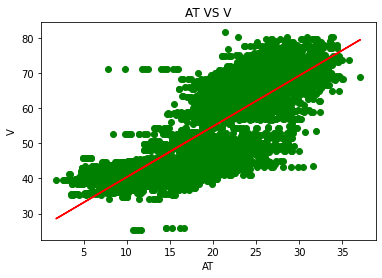

Train Set


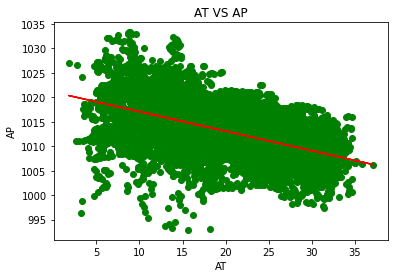

Train Set


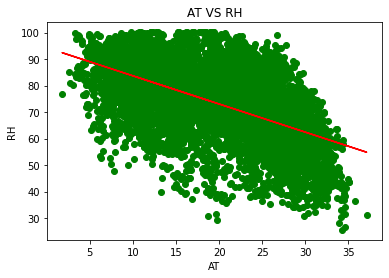

Train Set


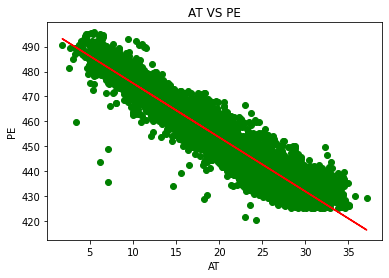

Train Set


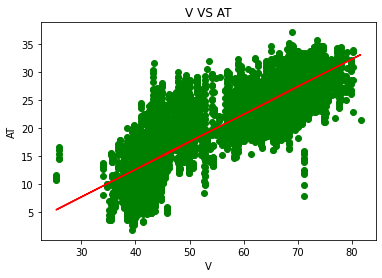

Train Set


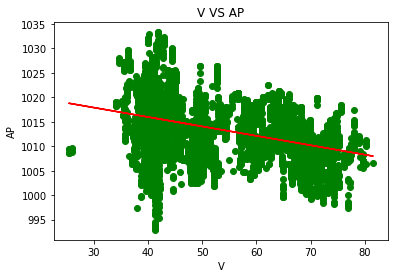

Train Set


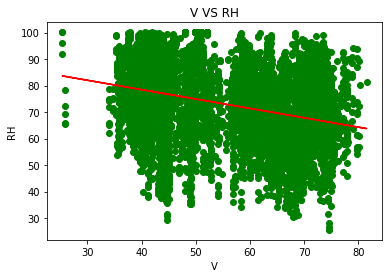

Train Set


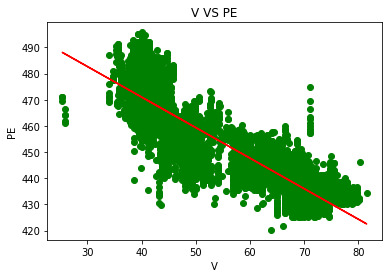

Train Set


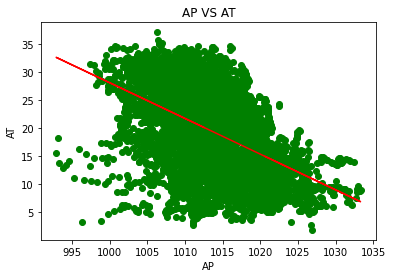

Train Set


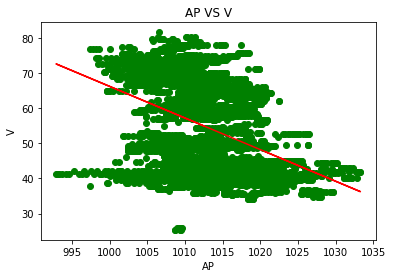

Train Set


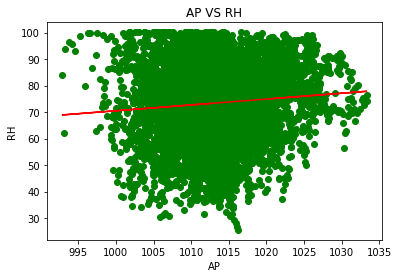

Train Set


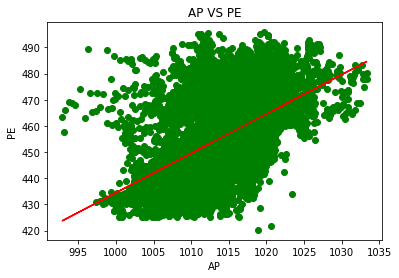

Train Set


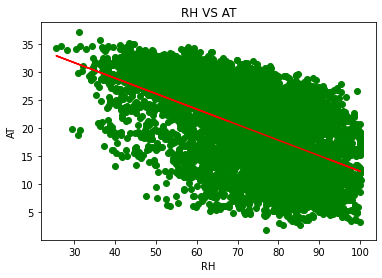

Train Set


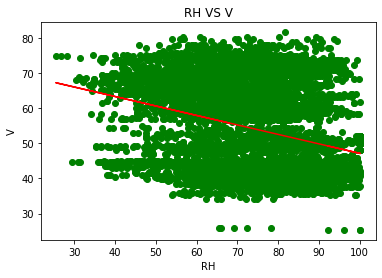

Train Set


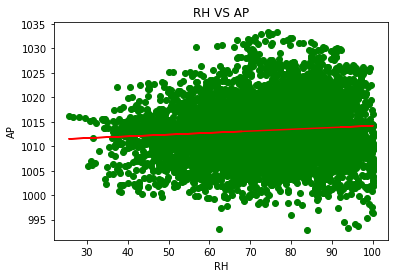

Train Set


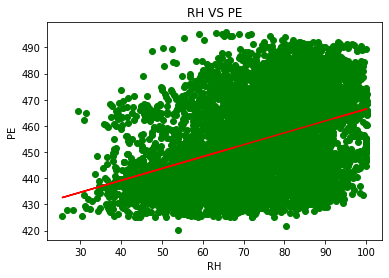

Train Set


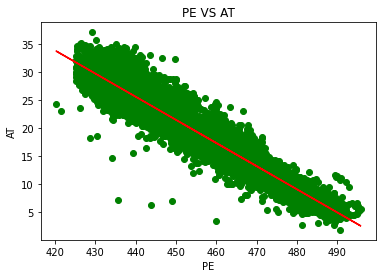

Train Set


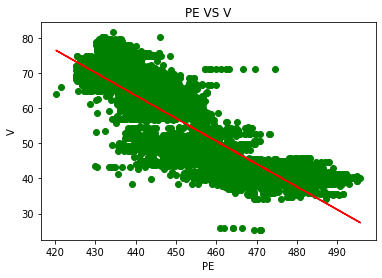

Train Set


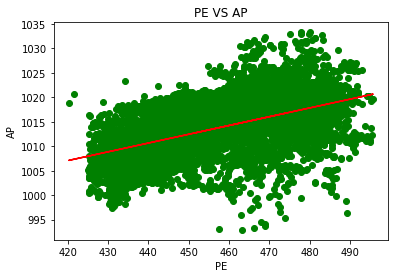

Train Set


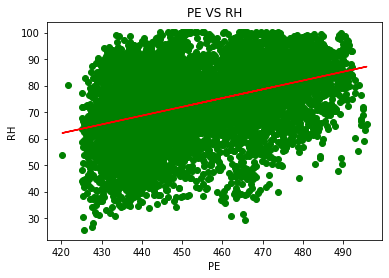

In [ ]:
linregtrn()

Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set


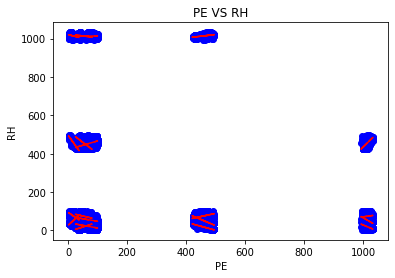

In [ ]:
linregtst()

We see that most of the graphs have collated together for the Test Set

Train Set


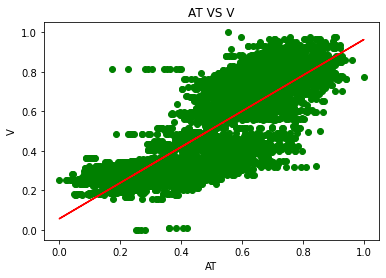

Train Set


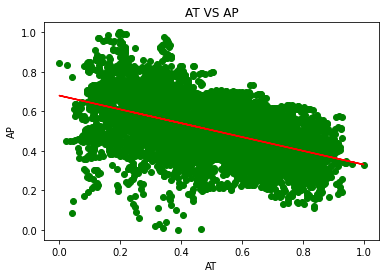

Train Set


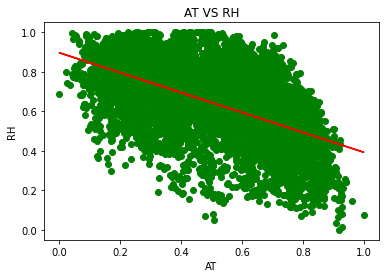

Train Set


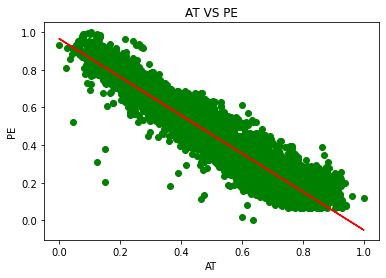

Train Set


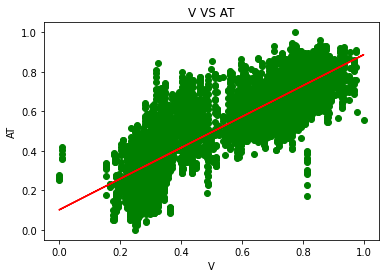

Train Set


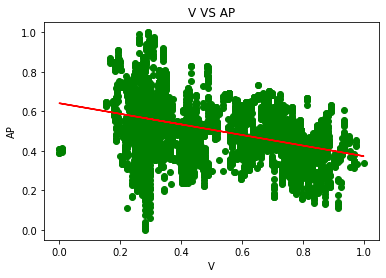

Train Set


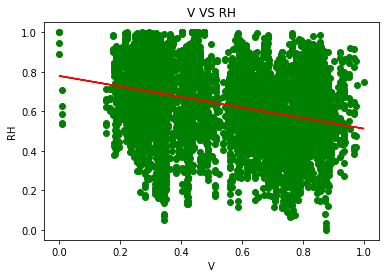

Train Set


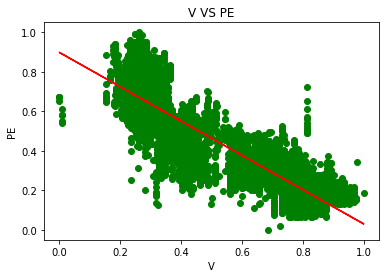

Train Set


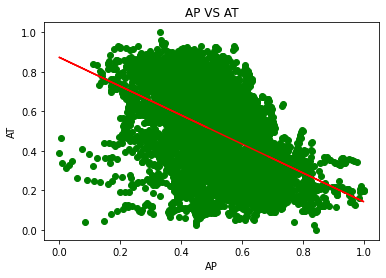

Train Set


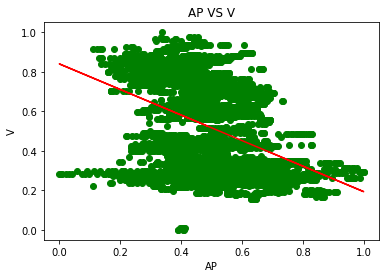

Train Set


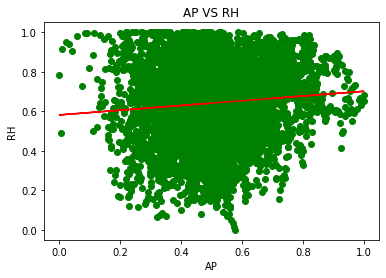

Train Set


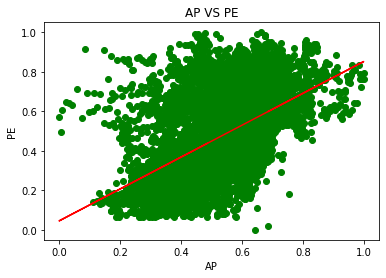

Train Set


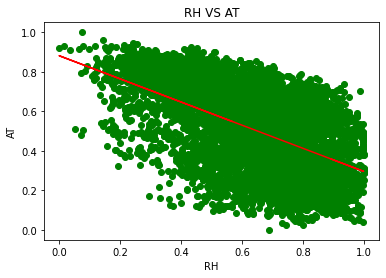

Train Set


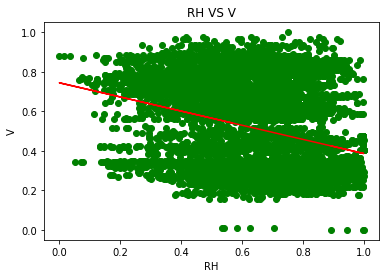

Train Set


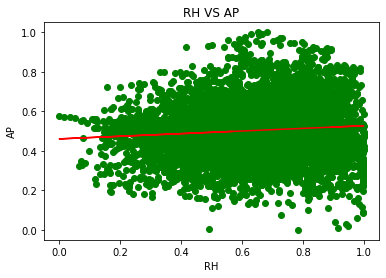

Train Set


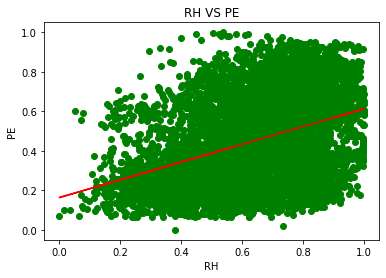

Train Set


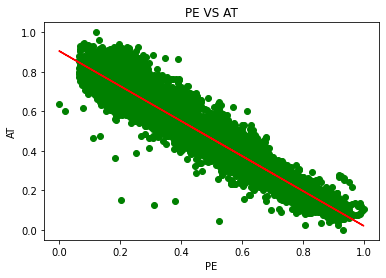

Train Set


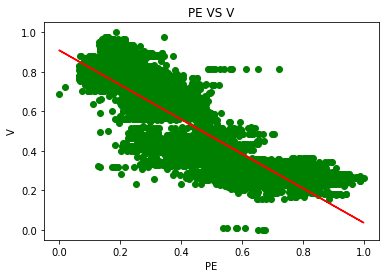

Train Set


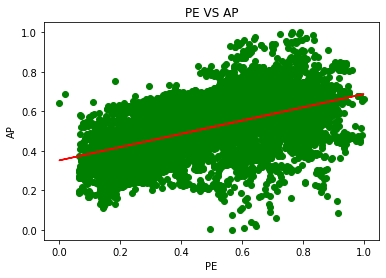

Train Set


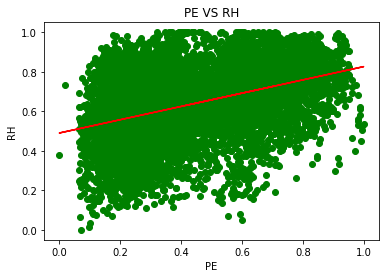

In [ ]:
nlinregtrn()

Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set
Test Set


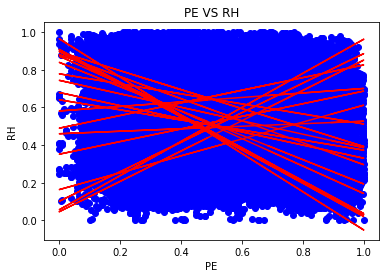

In [ ]:
nlinregtst()

In [ ]:
for col in dp.columns:
   t = dp[col]
   print(type(t))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
